### Visualization of the basic Edge distance map

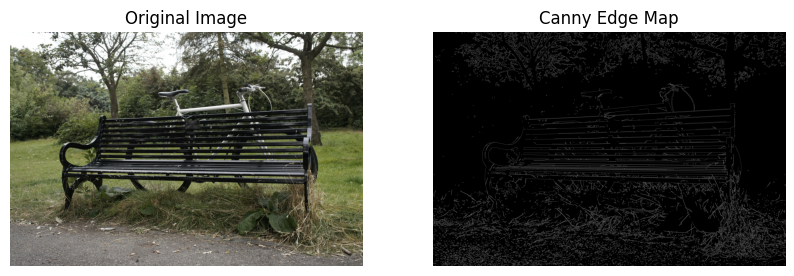

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기 (Grayscale로 변환)
# 'image.jpg'를 실제 이미지 경로로 바꿔주세요.
image_path = '/root/dev/junhee/ai_framework/datasets/mip_nerf_360/bicycle/images/_DSC8701.JPG'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. 노이즈 제거 (선택 사항이지만 권장)
# Canny는 노이즈에 민감하므로 Gaussian Blur를 먼저 적용하면 결과가 더 좋습니다.
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# 3. Canny Edge Detection 적용
# threshold1 (최소값): 이 값 이하는 엣지에서 제외
# threshold2 (최대값): 이 값 이상은 확실한 엣지로 간주
threshold1 = 100
threshold2 = 200
edges = cv2.Canny(img_blur, threshold1, threshold2)

# 4. 결과 시각화
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Map'), plt.axis('off')
plt.show()

# 5. 결과 저장 (필요시)
# cv2.imwrite('edge_map.png', edges)

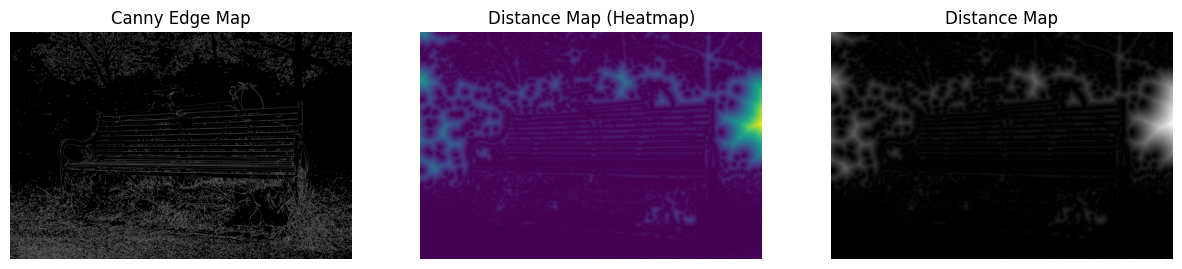

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 예시용 Canny Edge Map 생성 (이전 단계와 동일)
image_path = '/root/dev/junhee/ai_framework/datasets/mip_nerf_360/bicycle/images/_DSC8701.JPG' # 이미지가 없다면 에러가 날 수 있으니 경로 확인 필수
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    # 이미지가 없을 경우를 대비한 더미 데이터 생성
    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.circle(img, (250, 250), 100, 255, -1) 

# Canny Edge 검출
edges = cv2.Canny(img, 100, 200)

# ---------------------------------------------------------
# 2. Distance Transform 적용 (핵심 로직)
# ---------------------------------------------------------

# (1) 반전 (Invert): Distance Transform은 '0' 픽셀까지의 거리를 잰다.
# 따라서 Edge(255)를 0으로, 배경(0)을 255로 만들어야 함.
edges_inv = cv2.bitwise_not(edges)

# (2) 거리 계산 (L2 Norm: 유클리드 거리)
# dist_map의 각 픽셀 값은 가장 가까운 엣지까지의 '실수(float)' 거리
dist_map = cv2.distanceTransform(edges_inv, distanceType=cv2.DIST_L2, maskSize=5)

# (3) 시각화를 위한 정규화 (0 ~ 1 사이로 변환)
# 그냥 보면 값이 너무 커서 하얗게만 보일 수 있음
dist_norm = cv2.normalize(dist_map, None, 0, 1.0, cv2.NORM_MINMAX)

# ---------------------------------------------------------
# 3. 결과 시각화
# ---------------------------------------------------------
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Map')
plt.axis('off')

plt.subplot(132)
plt.imshow(dist_map, cmap='viridis') # 거리값 그대로 (색상으로 표현)
plt.title('Distance Map (Heatmap)')
plt.axis('off')

plt.subplot(133)
plt.imshow(dist_norm, cmap='gray') # 흑백 정규화
plt.title('Distance Map')
plt.axis('off')

plt.show()

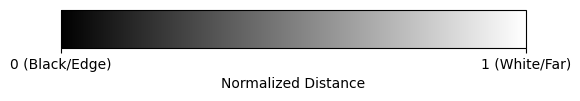

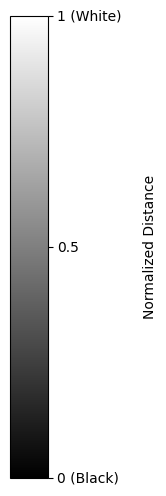

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# -------------------------------------------------------
# 설정: 0(Black) ~ 1(White) 범위 정의
# -------------------------------------------------------
cmap = plt.get_cmap('gray')  # 회색조
norm = mpl.colors.Normalize(vmin=0, vmax=1) # 데이터 범위 0 ~ 1

# -------------------------------------------------------
# 1. 가로형 (Horizontal) Colorbar
# -------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(6, 1)) # 가로로 긴 Figure 생성
fig1.subplots_adjust(bottom=0.5) # 텍스트 잘림 방지 여백

# ScalarMappable: 가상의 이미지 정보를 담는 객체
cb1 = fig1.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax1,             # 이 Axis에 그림
    orientation='horizontal'
)

# 라벨 설정
cb1.set_label('Normalized Distance')
cb1.set_ticks([0, 1])
cb1.set_ticklabels(['0 (Black/Edge)', '1 (White/Far)'])

plt.show()

# -------------------------------------------------------
# 2. 세로형 (Vertical) Colorbar
# -------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(1, 6)) # 세로로 긴 Figure 생성
fig2.subplots_adjust(right=0.5) # 텍스트 여백

cb2 = fig2.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax2,
    orientation='vertical'
)

# 라벨 설정
cb2.set_label('Normalized Distance', labelpad=15)
cb2.set_ticks([0, 0.5, 1])
cb2.set_ticklabels(['0 (Black)', '0.5', '1 (White)'])

plt.show()

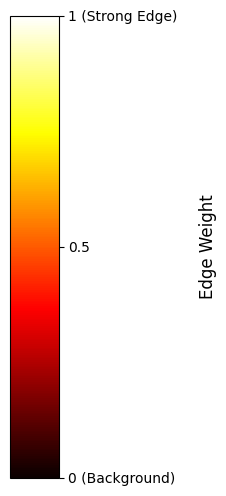

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 캔버스 설정 (세로로 길쭉한 형태)
# figsize를 조절하여 바의 두께를 결정합니다.
fig, ax = plt.subplots(figsize=(1.5, 6)) 
fig.subplots_adjust(right=0.45) # 텍스트가 잘리지 않도록 여백 확보

# 2. 컬러맵 설정 ('hot'으로 변경)
# 0(검정) -> 1(흰색/밝음)
cmap = plt.get_cmap('hot') 
norm = mpl.colors.Normalize(vmin=0, vmax=1)

# 3. Colorbar 그리기
cb = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,             
    orientation='vertical'
)

# 4. 라벨 및 틱 설정
# 아까 분석한 edge_mask의 의미에 맞춰 텍스트를 구성했습니다.
cb.set_label('Edge Weight', rotation=90, labelpad=15, fontsize=12)
cb.set_ticks([0, 0.5, 1])
cb.set_ticklabels(['0 (Background)', '0.5', '1 (Strong Edge)'])

# 폰트 크기 (필요시 조절)
ax.tick_params(labelsize=10)

# 5. 저장
# bbox_inches='tight'가 있어야 주변 여백을 자동으로 잘라줍니다.
plt.savefig('colorbar_hot_vertical.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [9]:
import cv2
import os

def images_to_video(image_folder, output_video_file, fps=30):
    """
    이미지 폴더의 이미지들을 순서대로 읽어 비디오로 변환합니다.
    
    :param image_folder: 이미지가 들어있는 폴더 경로
    :param output_video_file: 저장할 비디오 파일 이름 (예: output.mp4)
    :param fps: 초당 프레임 수 (Frames Per Second)
    """
    
    # 1. 폴더 내 이미지 파일 리스트 가져오기 (확장자 필터링)
    valid_extensions = ('.png', '.jpg', '.jpeg', '.tiff', '.bmp')
    images = [img for img in os.listdir(image_folder) if img.lower().endswith(valid_extensions)]
    
    # 2. 파일 이름 순으로 정렬 (중요: 1.jpg, 2.jpg... 순서 보장)
    # 참고: 파일명이 1, 10, 2 순서로 꼬인다면 natsort 라이브러리가 필요할 수 있습니다.
    images.sort() 
    
    if not images:
        print("폴더에 이미지가 없습니다.")
        return

    # 3. 첫 번째 이미지를 읽어서 비디오 해상도 결정
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)
    height, width, layers = frame.shape

    # 4. 비디오 코덱 설정 (mp4v는 MP4용 코덱)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
    video = cv2.VideoWriter(output_video_file, fourcc, fps, (width, height))

    print(f"총 {len(images)}장의 이미지를 비디오로 변환 중입니다...")

    # 5. 이미지를 한 장씩 읽어서 비디오에 쓰기
    for image in images:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        
        # 이미지 크기가 다르면 에러가 나므로 예외처리 (선택사항)
        if frame.shape[0] != height or frame.shape[1] != width:
            print(f"크기가 다른 이미지 발견 (건너뜀): {image}")
            continue
            
        video.write(frame)

    # 6. 작업 종료 및 메모리 해제
    video.release()
    cv2.destroyAllWindows()
    print(f"변환 완료! 저장된 파일: {output_video_file}")

# --- 사용 예시 ---
# 아래 경로를 본인의 이미지 폴더 경로로 수정하세요.
input_folder = '/root/dev/junhee/ai_framework/gaussian-splatting/output/treehill/video/ours_30000'   
output_file = '/root/dev/junhee/ai_framework/gaussian-splatting/output/treehill/video/treehill_3dgs.mp4'

# 폴더가 없다면 테스트용으로 생성 (실제 사용 시에는 필요 없음)
if not os.path.exists(input_folder):
    os.makedirs(input_folder)
    print(f"'{input_folder}' 폴더가 없어서 생성했습니다. 이미지를 넣고 실행해주세요.")
else:
    images_to_video(input_folder, output_file, fps=30)

총 600장의 이미지를 비디오로 변환 중입니다...
변환 완료! 저장된 파일: /root/dev/junhee/ai_framework/gaussian-splatting/output/treehill/video/treehill_3dgs.mp4


In [5]:
## Wavlet을 기반으로 Rendering된 이미지와 GT 비교해서 Loss 설계해보자. --> 과연 L1 Loss보다 효과적일까?

# Wavlet loss
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from utils.loss_utils import l1_loss, ssim

def haar_wavelet_decomposition(x):
    """
    Input: (B, C, H, W)
    Output: LL, LH, HL, HH (각각 B, C, H/2, W/2)
    """
    B, C, H, W = x.shape
    
    # Haar Wavelet Filters
    # LL: Averaging (Low pass)
    # LH, HL, HH: Differencing (High pass - Vertical, Horizontal, Diagonal)
    filters = torch.tensor([
        [[1, 1], [1, 1]],  # LL
        [[1, -1], [1, -1]], # LH (수평 변화 감지)
        [[1, 1], [-1, -1]], # HL (수직 변화 감지)
        [[1, -1], [-1, 1]]  # HH (대각선 변화 감지)
    ], dtype=x.dtype, device=x.device).unsqueeze(1) / 4.0 # (4, 1, 2, 2)

    # 채널별로 각각 적용하기 위해 reshape 및 groups 설정
    # 입력 x를 (B*C, 1, H, W)로 변경하여 Conv2d 적용
    x_reshaped = x.view(B * C, 1, H, W)
    
    # Stride 2로 다운샘플링 수행
    out = F.conv2d(x_reshaped, filters, stride=2, groups=1)
    
    # 다시 (B, C, 4, H/2, W/2) 형태로 복원
    out = out.view(B, C, 4, H // 2, W // 2)
    
    LL = out[:, :, 0, :, :]
    LH = out[:, :, 1, :, :]
    HL = out[:, :, 2, :, :]
    HH = out[:, :, 3, :, :]
    
    return LL, LH, HL, HH


class WaveletLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, pred, target):
        """
        pred, target: (B, C, H, W) - 렌더링 이미지 및 GT
        edge_dist_map: (B, 1, H, W) - 엣지까지의 거리 (0: 엣지 위, 값이 클수록 엣지에서 멂)
        """
        # 1. Wavelet 분해
        pred_LL, pred_LH, pred_HL, pred_HH = haar_wavelet_decomposition(pred)
        target_LL, target_LH, target_HL, target_HH = haar_wavelet_decomposition(target)
        

        # 4. Loss 계산
        # LL 밴드: 저주파는 그냥 비교 (색상 보존)
        loss_LL = F.l1_loss(pred_LL, target_LL)
        loss_LH = F.l1_loss(pred_LH, target_LH)
        loss_HL = F.l1_loss(pred_HL, target_HL)
        loss_HH = F.l1_loss(pred_HH, target_HH)
        
        
        # 전체 Loss 합산
        total_loss = loss_LL + loss_LH + loss_HL + loss_HH
        
        return total_loss





# Loading GT Image

GT_image_path = "/root/dev/junhee/ai_framework/gaussian-splatting/output/room/train/ours_30000/gt/00000.png"
Pred_image_path = "/root/dev/junhee/ai_framework/gaussian-splatting/output/room/train/ours_30000/renders/00000.png"

GT_image = cv2.imread(GT_image_path)
GT_image = cv2.cvtColor(GT_image, cv2.COLOR_BGR2RGB)
GT_image = GT_image.astype(np.float32) / 255.0  

Pred_image = cv2.imread(Pred_image_path)
Pred_image = cv2.cvtColor(Pred_image, cv2.COLOR_BGR2RGB)
Pred_image = Pred_image.astype(np.float32) / 255.0

# Calcualt L1 Loss
L11 = l1_loss(torch.tensor(Pred_image).permute(2,0,1).unsqueeze(0), torch.tensor(GT_image).permute(2,0,1).unsqueeze(0))
print("L1 Loss:", L11.item())

# Calculate SSIM Loss
SSIM_loss_value = ssim(torch.tensor(Pred_image).permute(2,0,1).unsqueeze(0), torch.tensor(GT_image).permute(2,0,1).unsqueeze(0))
print("SSIM Loss:", SSIM_loss_value.item())

# Calculate Wavelet Loss
wavelet_loss_fn = WaveletLoss()
wavelet_loss_value = wavelet_loss_fn(torch.tensor(Pred_image).permute(2,0,1).unsqueeze(0), torch.tensor(GT_image).permute(2,0,1).unsqueeze(0))
print("Wavelet Loss:", wavelet_loss_value.item())

L1 Loss: 0.014138372614979744
SSIM Loss: 0.9365531206130981
Wavelet Loss: 0.021300218999385834
